<a href="https://www.kaggle.com/code/sjagkoo7/boston-house-prediction-dataset-practise-am?scriptVersionId=139666089" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


# The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [2]:
columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house=pd.read_csv("/kaggle/input/boston-house-prices/housing.csv",delimiter=r"\s+",names=columns)
house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Data Pre-Processing

In [3]:
house.info()
#house.shape
#len(house)
#len(house.columns)
#house.nunique()
#house.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Finding out the correlation between the features
corr=house.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

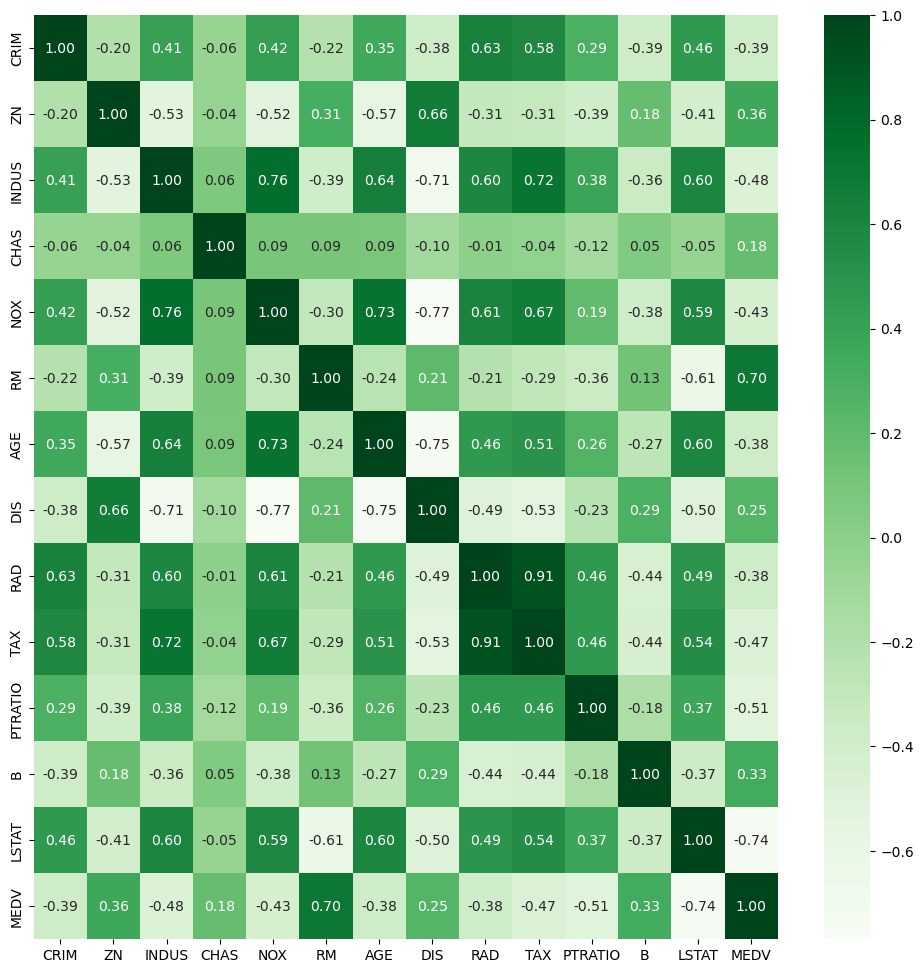

In [6]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True, fmt=".2f",cmap='Greens')

* No cleaning required
# Feature engineering 

In [7]:
# Spliting target variable and independent variables
#X= independent variables  or explanatory variable or causes variable
#y= target variable or final goal
X=house.drop('MEDV',axis=1)
y=house['MEDV']

##### Notes Reg. Random State selection
##### Why do we choose random state as 42 very often during training a machine learning model? why we dont choose 12 or 32 or 5? Is there a scientific explanation?

> If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
> To be specific, 42 has nothing to do with AI or ML. It is actually a generic number, In Machine Learning, it doesn't matter what the actual random number is, as mentioned in scikit API doc, any INTEGER is sufficient enough for the task at hand.
> 42 is a reference from Hitchhikers guide to galaxy book. The answer to life universe and everything and is meant as a joke. It has no other significance.

In [8]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

# Model Buliding - Linear regression

## Training the model

In [9]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
# Create a Linear regressor
lr=LinearRegression()
# Train the model using the training sets
lr.fit(X_train,y_train)

LinearRegression()

* if y^ is the predicted value.
* y^(w, x) = w0 + w1x1+. . . +wpxp
* Across the module, we designate the vector w = (w1, . . . , wp) as coef and w0 as intercept .

In [10]:
# Value of y intercept
lr.intercept_

36.35704137659525

In [11]:
#lr.coef_
#coefficients=pd.DataFrame([X_train.columns,lr.coef_])
coefficients=pd.DataFrame([X_train.columns,lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attribute',1:'Coeffcients'})
coefficients

,Attribute,Coeffcients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


# Model Prediction

In [12]:
# Model prediction on train data
y_pred=lr.predict(X_train)

* Formula : R^2 Adjusted = 1- {(1-R^2)(n-1)/(n-p-1)}
* R^2 = normal R^2 square
* n = no.of rows in data set
* p = no. of features

# Model Evaluation

In [13]:
#model Evaluation
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2 :',1-((1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1))/(len(y_train)-len(house.columns)-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
train_predicted_score = [0.7465991966746854,0.736910342429894,3.08986109497113,19.07368870346903,4.367343437774162]

R^2: 0.7465991966746854
Adjusted R^2 : 0.7361342667438465
MAE: 3.089861094971132
MSE: 19.07368870346903
RMSE: 4.367343437774162


* 𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
* Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors. 
* MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 
* MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.
* RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

Text(0, 0.5, 'predicted prices')

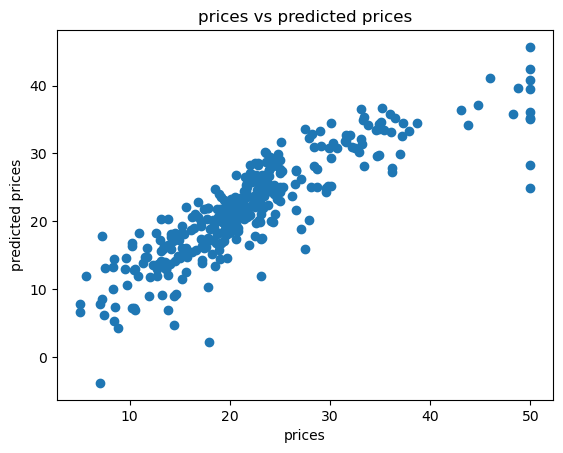

In [14]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.title('prices vs predicted prices')
plt.xlabel('prices')
plt.ylabel('predicted prices')

##### There are four assumptions associated with a linear regression model:
* Linearity: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.

Text(0, 0.5, 'residuals')

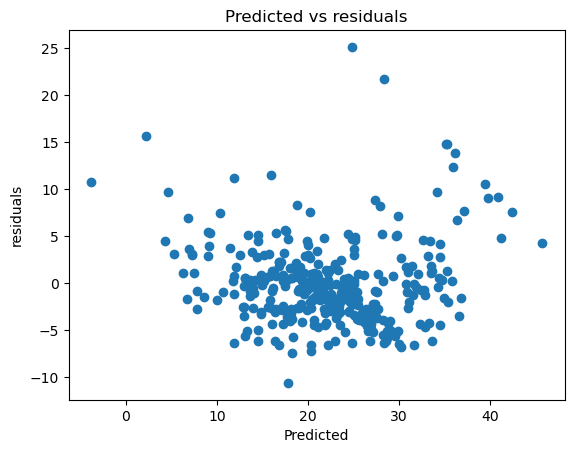

In [15]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title('Predicted vs residuals')
plt.xlabel('Predicted')
plt.ylabel('residuals')

* There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied



In [16]:
# Predicting Test data with the model
y_pred_test=lr.predict(X_test)

In [17]:
#model Evaluation
print('R^2:',metrics.r2_score(y_test,y_pred_test))
print('Adjusted R^2 :',1-((1-metrics.r2_score(y_test,y_pred_test))*(len(y_test)-1))/(len(y_test)-len(house.columns)-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
test_predicted_score=[0.7121818377409181,0.6850685326005699,3.8590055923707487,30.053993307124273,5.4821522513629874]

R^2: 0.7121818377409183
Adjusted R^2 : 0.6827697627655376
MAE: 3.8590055923707482
MSE: 30.053993307124266
RMSE: 5.482152251362987


In [18]:
#train_predicted_score
#test_predicted_score
# score_compared=pd.DataFrame(columns=['train_predicted_score','test_predicted_score'])
# score_compared['train_predicted_score']=train_predicted_score
# score_compared['test_predicted_score']=test_predicted_score
score_compared=pd.DataFrame({'train_predicted_score':train_predicted_score,'test_predicted_score':test_predicted_score})
score_compared.index=['R^2','Adjusted R^2','MAE','MSE','RMSE']
score_compared

,train_predicted_score,test_predicted_score
R^2,0.746599,0.712182
Adjusted R^2,0.736910,0.685069
MAE,3.089861,3.859006
MSE,19.073689,30.053993
RMSE,4.367343,5.482152


* Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.